# Programing Assignment: Forward Kinematics 
- Name: Israel Ivan Arroyo Parada
- ID: A01706190
- Professor: Jesus Arturo Escobedo

## Programing exercise
- These exercises must be solved INDIVIDUALLY
- Write a report explaining any consideration taken during the development of these codes.
- The report must include relevant figures and relevant numerical quantities.
- This activity will account for the 50% of your M1 and M3 modules grade.  

## Forward Kinematics Model 
In order to grade your submission exercise 3 MUST be solved for the general case with n joints, where  
n=1…∞

 

In [1]:
# comment matplotlib widget if static images needed
# comment matplotlib inline if interactive graphs needed
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
I = 0
# FUNCTIONS FROM PAST ASSIGNMENT
def my_rotx(theta):
    """
    Write a function called my_rotx(theta) that takes as input the angle
    theta in radians and computes the fundamental rotation matrix around
    the x-axis.(It should give as result a 3x3 matrix).
    :input: degrees
    """
    rad = radians(theta) 
    res = np.matrix([[1,         0,           0],
                     [0,    cos(rad), -sin(rad)],
                     [0,    sin(rad), cos(rad)]])
    t_b = np.matrix([[0],
                     [0],
                     [0]])
    btm_row = np.matrix([[0, 0, 0, 1]])
    htm = np.hstack([res,t_b])  # adds t_b col
    htm = np.vstack([htm,btm_row])  # adds btm_row
    return htm


def my_roty(theta):
    """
    Write a function called my_roty(theta) that takes as input the angle
    theta in radians and computes the fundamental rotation matrix around
    the y-axis. (It should give as result a 3x3 matrix).
    :input: degrees
    """
    rad = radians(theta) 
    res = np.matrix([[cos(rad),   0,       sin(rad)],
                     [0,          1,       0       ],
                     [sin(rad),  0,       cos(rad)]])
    t_b = np.matrix([[0],
                     [0],
                     [0]])
    btm_row = np.matrix([[0, 0, 0, 1]])
    htm = np.hstack([res,t_b])  # adds t_b col
    htm = np.vstack([htm,btm_row])  # adds btm_row
    return htm


def my_rotz(theta):
    """
    Write a function called my_rotz(theta) that takes as input the angle
    theta in radians and computes the fundamental rotation matrix around
    the z-axis. (It should give as result a 3x3 matrix).
    :input: degrees
    """
    rad = radians(theta) 
    res = np.matrix([[cos(rad), -sin(rad), 0],
                     [sin(rad), cos(rad),  0],
                     [0,               0,                1]])
    t_b = np.matrix([[0],
                     [0],
                     [0]])
    btm_row = np.matrix([[0, 0, 0, 1]])
    htm = np.hstack([res,t_b])  # adds t_b col
    htm = np.vstack([htm,btm_row])  # adds btm_row
    return htm
 

def my_transl(x=0,y=0,z=0):
    """
    Write a function my_transl(x,y,z) that takes as input the translations
    around the x, y, and z axis and gives you the corresponding homogeneous
    transformation matrix. (It should give as result a 4x4 matrix). 
    """
    # id_matrix can be swaped for any rot matrix in the future
    id_matrix = np.matrix([[1, 0, 0],
                           [0, 1, 0],
                           [0, 0, 1]])
    t_b = np.matrix([[x],
                     [y],
                     [z]])
    btm_row = np.matrix([[0, 0, 0, 1]])
    htm = np.hstack([id_matrix,t_b])  # adds t_b col
    htm = np.vstack([htm,btm_row])  # adds btm_row
    return htm


### Task 1
Write a function that will solve the **Forward Kinematics (FK)** of a planar 2R robot. The function must be named FK and must be called by typing P = FK(L, q). The output (P) will be a 2x1 vector  containing the end-effector’s $[x,y]$ coordinates expressed in the base frame. The function require s link lengths $L=[L_1,L_2]$ as inputs, as well as the current joint configuration vector $q=[\theta_1,\theta_2]$
Test your function using different configurations. 

In [2]:
def FK(L, q):
    """
    :input: q must be in degrees
    """
    l1 = L[0]
    l2 = L[1]
    q1 = radians(q[0])
    q2 = radians(q[1])
    c1 = cos(q1)
    c2 = cos(q2)
    c12 = cos(q1 + q2)
    s1 = sin(q1)
    s12 = sin(q1 + q2)
    bTe = np.matrix([[c12, -s12, 0, l2*c12 + l1*c1],
                     [s12,  c12, 0, l2*s12 + l1*s1],
                     [0,      0, 1,              0],
                     [0,      0, 0,              1]])
    return (bTe[0,3],bTe[1,3])


### Task 2
Write a function that will plot the current configuration of the 2R robot. Use it to check your previous function.  (You could also use Gazebo to simulate the robot and verify your function).

In [3]:

def two_dof_plot(q1, q2, l1, l2):
    # l1 = 2 # length of first arm
    # l2 = 2 # length of second arm
    theta1 = radians(q1)
    theta2 = radians(q2)
    x1 = l1*cos(theta1)
    y1 = l1*sin(theta1)
    x2 = l1 * cos(theta1) + l2 * cos(theta1 + theta2)
    y2 = l1 * sin(theta1) + l2 * sin(theta1 + theta2)
    points = np.matrix([[0, 0], [x1, y1], [x2, y2]])
    print(x2, y2)
    plt.figure()
    plt.plot(points[:,0], points[:,1])
    plt.plot(points[:,0], points[:,1], 'r*')







(2.732050807568877, -0.7320508075688775)
2.732050807568877 -0.7320508075688775


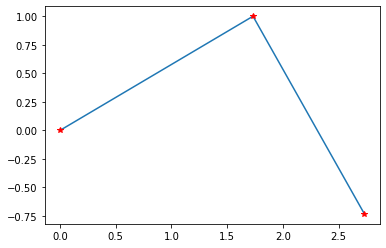

In [4]:
l = [2, 2]
q = [30, -90]
P = FK(l, q)
print(P)
two_dof_plot(q[0], q[1], l[0], l[1])

(0.7320508075688779, 2.732050807568877)
0.7320508075688779 2.732050807568877


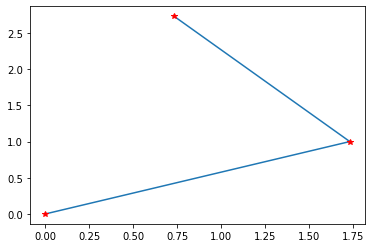

In [5]:
l = [2, 2]
q = [30, 90]
P = FK(l, q)
print(P)
two_dof_plot(q[0], q[1], l[0], l[1])

(2.259450085854494, 3.226829136446395)
2.259450085854494 3.226829136446395


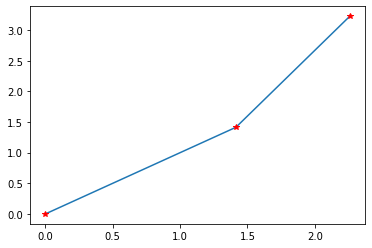

In [6]:
l = [2, 2]
q = [45, 20]
P = FK(l, q)
print(P)
two_dof_plot(q[0], q[1], l[0], l[1])

### Task 3
Write a function that will solve the FK for ANY open linked chain. The function must be named GENFK and be called by typing T = GENFK(sigma, a, alpha, d, theta, q. The  output will be a 4x4 matrix containing the end-effector’s position and orientation with respect to  the  base  frame.  The  function  requires  the chain's DH parameters $a=[a_1…a_n]^T$, $\alpha =[\alpha_1 … \alpha_n]^T$, $d=[d_1…d_n]^T$, $\theta=[\theta_1…\theta_n]^T$
as inputs and a Boolean vector sigma ($\sigma$) which denotes the type of joint. Use $\sigma_i=0$ for R joints and 
$\sigma_i = 1$ for P type joints. Your function must work with any combination of R and P joints. Note that the current joint configuration vector q is a mix of joint variable $d_i$ and $theta_i$.

In [7]:
def GENFK(sigma, a, alpha, d, theta, q):
    joints = len(sigma)
    t = np.identity(4)
    for i in range(joints):
        if sigma[i] == 0: # R joint
            t = t* my_rotz(q[i]+theta[i])*my_transl(0, 0, d[i])*my_transl(a[i], 0, 0)*my_rotx(alpha[i])
        else: # P joint
            t = t* my_rotz(theta[i])*my_transl(0, 0, q[i]+d[i])*my_transl(a[i], 0, 0)*my_rotx(alpha[i])
    return t
    
def super_plot(sigma, a, alpha, d, theta, q):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    
    joints = len(sigma)
    t = np.identity(4)
    x = [0]
    y = [0]
    z = [0]
    for i in range(joints):
        if sigma[i] == 0: # R joint
            t = t* my_rotz(q[i]+theta[i])*my_transl(0, 0, d[i])*my_transl(
                           a[i], 0, 0)*my_rotx(alpha[i])
            
        else: # P joint
            t = t* my_rotz(theta[i])*my_transl(0, 0, q[i]+d[i])*my_transl(
                           a[i], 0, 0)*my_rotx(alpha[i])

        x.append(t[0,3])
        y.append(t[1,3])
        z.append(t[2,3])
    ax.plot3D(x, y, z, 'gray')
    ax.scatter(x,y,z,'blue')


### Task 4
Use GENFK to write the FK of the 2DOF RP robot seen in class. Suitably modify the plotting function (2) in order to visualize the robot’s configuration. (Or simulate this robot in gazebo to verify it). 
![Fig1](./_resources/GetImage.png)

[[-6.123234e-17 -6.123234e-17  1.000000e+00  4.000000e+00]
 [ 6.123234e-17 -1.000000e+00 -6.123234e-17  2.000000e+00]
 [ 1.000000e+00  6.123234e-17  6.123234e-17  2.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]


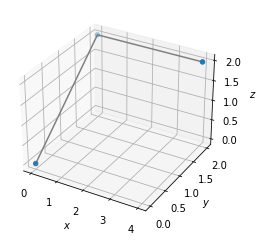

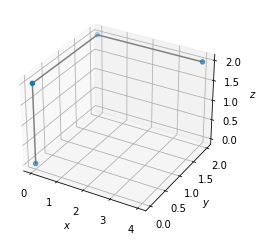

In [8]:
def two_dof_plot2(q1, q2):
    c1 = 2
    c2 = 2
    c3 = 2
    c4 = 2
    # q1 = 90  # degrees
    # q2 = 0  # distance
    q1 = radians(q1)
    fig = plt.figure()

    ax = plt.axes(projection='3d')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    x = [0,0,c3,c3]
    y = [0,0,0,c2+c4]
    z = [0,c1,c1,c1]
    l1 = c3
    l2 = c2 + c4
  
    x2 = l1*cos(q1)
    y2 = l1*sin(q1)
    x3 = l1 * cos(q1) + (l2+q2) * cos(q1 - radians(90))
    y3 = l1 * sin(q1) + (l2+q2) * sin(q1 - radians(90))


    x[2] = x2
    y[2] = y2
    x[3] = x3
    y[3] = y3
    ax.plot3D(x, y, z, 'gray')
    ax.scatter(x,y,z,'blue')

def test():
    """
    """
    # sigma = 0 for R joints and 
    # sigma = 1 for P type joints

    c1 = 2
    c2 = 2
    c3 = 2
    c4 = 2
    q1 = 90  # degrees
    q2 = 0  # distance

    sigma = [0, 1]
    a = [c3, 0]
    alpha = [90, 0]
    d = [c1, c2 + c4]
    theta = [0, 90]
    q = [q1,q2]
    T =  GENFK(sigma, a, alpha, d, theta, q)
    print(T)
    super_plot(sigma, a, alpha, d, theta, q)
    two_dof_plot2(q1, q2)
test()

Aquí tenemos 2 metodos de graficar este robot. En el primero solo tomo las cordenadas obtenidas de una función modificada de GENFK(). Se puede observar que llegan a un punto igual, con algún error de redondeo. Ahora, si lo probamos con rviz

Para comprobar aun más la posicion, tomé estos mismos datos y los grafiqué en Rviz, copiando la misma funcion de GENFK y publiqué t en cada iteración para graficar la pose deseada.
![Fig1](./_resources/im1.png)


[[ 1.23259516e-32 -7.07106781e-01  7.07106781e-01  4.24264069e+00]
 [ 8.65956056e-17 -7.07106781e-01 -7.07106781e-01 -1.41421356e+00]
 [ 1.00000000e+00  6.12323400e-17  6.12323400e-17  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


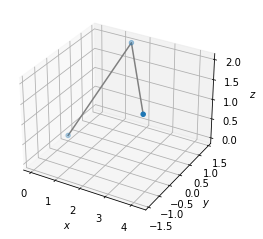

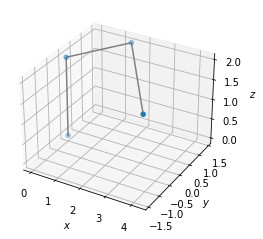

In [9]:
def test1_2():
    """
    """
    # sigma = 0 for R joints and 
    # sigma = 1 for P type joints

    c1 = 2
    c2 = 2
    c3 = 2
    c4 = 2
    q1 = 45  # degrees
    q2 = 0  # distance

    sigma = [0, 1]
    a = [c3, 0]
    alpha = [90, 0]
    d = [c1, c2 + c4]
    theta = [0, 90]
    q = [q1,q2]
    T =  GENFK(sigma, a, alpha, d, theta, q)
    print(T)
    super_plot(sigma, a, alpha, d, theta, q)
    two_dof_plot2(q1, q2)
test1_2()

![Fig1](./_resources/im22.png)
Aquí cambio la grados en el joint rotatorio y podemos hacer la misma comparativa, con buenos resultados.

[[ 1.23259516e-32 -7.07106781e-01  7.07106781e-01  1.13137085e+01]
 [ 8.65956056e-17 -7.07106781e-01 -7.07106781e-01 -8.48528137e+00]
 [ 1.00000000e+00  6.12323400e-17  6.12323400e-17  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


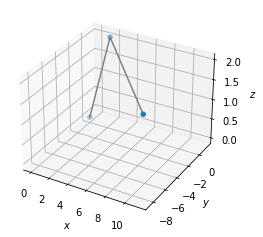

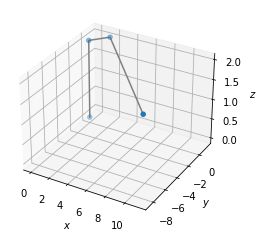

In [10]:
def test1_2():
    """
    """
    # sigma = 0 for R joints and 
    # sigma = 1 for P type joints

    c1 = 2
    c2 = 2
    c3 = 2
    c4 = 2
    q1 = 45  # degrees
    q2 = 10  # distance

    sigma = [0, 1]
    a = [c3, 0]
    alpha = [90, 0]
    d = [c1, c2 + c4]
    theta = [0, 90]
    q = [q1,q2]
    T =  GENFK(sigma, a, alpha, d, theta, q)
    print(T)
    super_plot(sigma, a, alpha, d, theta, q)
    two_dof_plot2(q1, q2)
test1_2()

![Fig1](./_resources/im23.png)
En este último ejemplo vemos la rotacion de 45 grados junto con un nuevo input de distancia del joint prismático.

### Task 5
Use GENFK to write the FK of the 6-axes robot shown in Figure 3. Suitably modify the plotting function (2) in order to visualize the robot’s configuration. (Or simulate this robot in gazebo to verify it). 
![Fig1](./_resources/GetImage_2.png)
 

In [11]:

def test2():
    l = 2

    q1 = 90
    q2 = 90
    q3 = 90

    theta = [0, 0, 0, 90, 90, 0]
    sigma = [0, 0, 1, 0, 0, 0]
    a = [0,0,0,0,0,0]
    alpha = [-90, -90, 0, -90, -90, 0]
    d = [l + l, l,l,l,0,l+l]
    q = [0,0,0,0,0,0]
    T =  GENFK(sigma, a, alpha, d, theta, q)
    print(T)

test2()

[[-6.12323400e-17  1.00000000e+00 -1.22464680e-16 -4.89858720e-16]
 [-1.83697020e-16  1.22464680e-16  1.00000000e+00  6.00000000e+00]
 [ 1.00000000e+00  6.12323400e-17  1.83697020e-16  7.34788079e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


![Fig1](./_resources/im31.png)
Aquí obtenemos una grafica muy parecida a lo que buscamos. Se observa que el link3 y el link4 tienen una rotacion de 180 grados, comparado con el dibujo de la izquierda. A pesar de esto el efector final mantiene la pose deseada.

![Fig1](./_resources/im32.png)
Si cambiamos la rotacion del primer joint a 45 grados, la pose del primer link rota como debería junto con los demas joints.

![Fig1](./_resources/im33.png)
En esta ultima prueba se puede observar una rotación de -45 grados en el primer joint y un desplazamiento de 50 cm en el 3er joint(visualizado a partir del 2o link). 

In [12]:
## Código utilizado para graficar en rviz
#!/usr/bin/env python
"""
import rospy
import tf
import tf2_ros
import geometry_msgs.msg
from math import *
import numpy as np


# FUNCTIONS FROM PAST ASSIGNMENT
def my_rotx(theta):
    rad = radians(theta) 
    res = np.matrix([[1,         0,           0],
                     [0,    cos(rad), -sin(rad)],
                     [0,    sin(rad), cos(rad)]])
    t_b = np.matrix([[0],
                     [0],
                     [0]])
    btm_row = np.matrix([[0, 0, 0, 1]])
    htm = np.hstack([res,t_b])  # adds t_b col
    htm = np.vstack([htm,btm_row])  # adds btm_row
    return htm


def my_roty(theta):
    rad = radians(theta) 
    res = np.matrix([[cos(rad),   0,       sin(rad)],
                     [0,          1,       0       ],
                     [sin(rad),  0,       cos(rad)]])
    t_b = np.matrix([[0],
                     [0],
                     [0]])
    btm_row = np.matrix([[0, 0, 0, 1]])
    htm = np.hstack([res,t_b])  # adds t_b col
    htm = np.vstack([htm,btm_row])  # adds btm_row
    return htm


def my_rotz(theta):
    rad = radians(theta) 
    res = np.matrix([[cos(rad), -sin(rad), 0],
                     [sin(rad), cos(rad),  0],
                     [0,               0,                1]])
    t_b = np.matrix([[0],
                     [0],
                     [0]])
    btm_row = np.matrix([[0, 0, 0, 1]])
    htm = np.hstack([res,t_b])  # adds t_b col
    htm = np.vstack([htm,btm_row])  # adds btm_row
    return htm
 

def my_transl(x=0,y=0,z=0):
    # id_matrix can be swaped for any rot matrix in the future
    id_matrix = np.matrix([[1, 0, 0],
                           [0, 1, 0],
                           [0, 0, 1]])
    t_b = np.matrix([[x],
                     [y],
                     [z]])
    btm_row = np.matrix([[0, 0, 0, 1]])
    htm = np.hstack([id_matrix,t_b])  # adds t_b col
    htm = np.vstack([htm,btm_row])  # adds btm_row
    return htm

def rot2quat(R):
    x = 0
    y = 1
    z = 2
    a = R[:, 2]
    n = R[:, 1]
    s = R[:, 0]
    # print(s)
    q0 = (1/2) * sqrt(s[x] + n[y]+ a[z] + 1)
    q1 = (1/2) * np.sign(n[z] - a[y]) * sqrt( s[x] - n[y] - a[z] + 1)
    q2 = (1/2) * np.sign(a[x] - s[z]) * sqrt(-s[x] + n[y] - a[z] + 1)
    q3 = (1/2) * np.sign(s[y] - n[x]) * sqrt(-s[x] - n[y] + a[z] + 1)

    # print(a[x][0,0])

    q = (q0,q1,q2,q3)
    # print(q)
    return q


if __name__ == '__main__':
    l = 0.2

    q1 = 90
    q2 = 90
    q3 = 90

    theta = [0, 0, 0, 90, 90, 0]
    sigma = [0, 0, 1, 0, 0, 0]
    a = [0,0,0,0,0,0]
    alpha = [-90, 90, 0, -90, 90, 0]
    d = [l+l, l,l,l,0,l+l]
    q = [-45,0,0.5,0,0,0]

    # c1 = 0.2
    # c2 = 0.2
    # c3 = 0.2
    # c4 = 0.2
    # q1 = 45  # degrees
    # q2 = 0.2  # distance

    # sigma = [0, 1]
    # a = [c3, 0]
    # alpha = [90, 0]
    # d = [c1, c2 + c4]
    # theta = [0, 90]
    # q = [q1,q2]

    rospy.init_node('my_static_tf2_broadcaster')
    broadcaster = tf2_ros.StaticTransformBroadcaster()
    static_transformStamped = geometry_msgs.msg.TransformStamped()
    joints = len(sigma)
    t = np.identity(4)
    rate = rospy.Rate(5)
    
    while not rospy.is_shutdown():
        static_transformStamped = geometry_msgs.msg.TransformStamped()
        static_transformStamped.header.stamp = rospy.Time.now()
        static_transformStamped.header.frame_id = "world"
        static_transformStamped.child_frame_id = "link0"

        static_transformStamped.transform.translation.x = 0
        static_transformStamped.transform.translation.y = 0
        static_transformStamped.transform.translation.z = 0
        quat = tf.transformations.quaternion_from_matrix(t)

        static_transformStamped.transform.rotation.x = 0
        static_transformStamped.transform.rotation.y = 0
        static_transformStamped.transform.rotation.z = 0
        static_transformStamped.transform.rotation.w = 1
        broadcaster.sendTransform(static_transformStamped)
        # for i in range(6):
        joints = len(sigma)
        t = np.identity(4)
        t_ant = t
        frame = "link0"
        for i in range(joints):
            if sigma[i] == 0: # R joint
                t = t* my_rotz(q[i]+theta[i])*my_transl(0, 0, d[i])*my_transl(a[i], 0, 0)*my_rotx(alpha[i])
            else: # P joint
                t = t* my_rotz(theta[i])*my_transl(0, 0, q[i]+d[i])*my_transl(a[i], 0, 0)*my_rotx(alpha[i])
            # t=t_ant*t
            static_transformStamped = geometry_msgs.msg.TransformStamped()
            link_name = "link{0}".format(i+1)
            static_transformStamped.header.stamp = rospy.Time.now()
            static_transformStamped.header.frame_id = "link0"
            static_transformStamped.child_frame_id = link_name 
            frame = link_name

            static_transformStamped.transform.translation.x = t[0, 3]
            static_transformStamped.transform.translation.y = t[1, 3]
            static_transformStamped.transform.translation.z = t[2, 3]
            quat = tf.transformations.quaternion_from_matrix(t)

            static_transformStamped.transform.rotation.x = quat[3]
            static_transformStamped.transform.rotation.y = quat[2]
            static_transformStamped.transform.rotation.z = quat[1]
            static_transformStamped.transform.rotation.w = quat[0]
            broadcaster.sendTransform(static_transformStamped)
            t_ant = t
        rate.sleep()
"""
pass

### Task 6
Write a function
1. A = rot2Euler(R) which takes a valid orientation matrix as input and outputs a valid Euler Angles representation.  
2. R= euler2rot(A) which takes a valid set of Euler Angles as input and outputs a valid orientation matrix.

In [13]:
def rot2Euler(R):
    """
    ZXZ
    """

    sy = sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])

    singular = sy < 1e-6

    if  not singular :
        x = atan2(R[2,1] , R[2,2])
        y = atan2(-R[2,0], sy)
        z = atan2(R[1,0], R[0,0])
    else :
        x = atan2(-R[1,2], R[1,1])
        y = atan2(-R[2,0], sy)
        z = 0

    return np.array([x, y, z])

def euler2rot(A):
    """
    ZXZ
    """
    r = my_rotz(A[0])*my_rotx(A[1])*my_rotz(A[2])
    return r

In [14]:
def testq_1():
    t = np.identity(3)
    grad = rot2Euler(t)
    print(grad)

testq_1()

[ 0. -0.  0.]


In [15]:
def testq_2():
    t = np.matrix([[1, 1, 0], [1, 1, 0], [0, 0, 0]])
    grad = rot2Euler(t)
    print(grad)

testq_2()

[0.         0.         0.78539816]


In [16]:
def testq_3():
    grad = [0, 0, 0]
    t = euler2rot(grad)
    print(t)

testq_3()

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Aquí se presentan 3 ejemplos del funcionamiento de las conversiones hechas de manera correcta

### Task 7
Write a function for  

1. Q  =  rot2quat(R)  which  takes  a valid orientation matrix as input and outputs  a valid Quaternion representation.  
2. R=  quat2rot(Q)  which  takes  a  valid Quaternion as input and outputs a valid orientation matrix 

In [17]:
def rot2quat(R):
    x = 0
    y = 1
    z = 2
    a = R[:, 2]
    n = R[:, 1]
    s = R[:, 0]

    q0 = (1/2) * sqrt(s[x] + n[y] + a[z] + 1)
    q1 = (1/2) * np.sign(n[z] - a[y]) * sqrt( s[x] - n[y] - a[z] + 1)
    q2 = (1/2) * np.sign(a[x] - s[z]) * sqrt(-s[x] + n[y] - a[z] + 1)
    q3 = (1/2) * np.sign(s[y] - n[x]) * sqrt(-s[x] - n[y] + a[z] + 1)


    q = [q0,q1,q2,q3]
    return q

    
def quat2rot(Q):
    q0 = Q[0]
    q1 = Q[1]
    q2 = Q[2]
    q3 = Q[3]

    r00 = 2 * (q0 * q0 + q1 * q1) - 1
    r01 = 2 * (q1 * q2 - q0 * q3)
    r02 = 2 * (q1 * q3 + q0 * q2)
     
    r10 = 2 * (q1 * q2 + q0 * q3)
    r11 = 2 * (q0 * q0 + q2 * q2) - 1
    r12 = 2 * (q2 * q3 - q0 * q1)
     
    r20 = 2 * (q1 * q3 - q0 * q2)
    r21 = 2 * (q2 * q3 + q0 * q1)
    r22 = 2 * (q0 * q0 + q3 * q3) - 1
     
    r = np.array([[r00, r01, r02],
                  [r10, r11, r12],
                  [r20, r21, r22]])
                            
    return r



In [18]:
def testr1():
    t = np.identity(4)
    print(rot2quat(t))

testr1()

[1.0, 0.0, 0.0, 0.0]


In [19]:
def testr2():
    quat = [0,0,0,1]
    print(quat2rot(quat))

testr2()

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]


Aquí tenemos en funcionamiento estos casos de conversiones que demuestran el funcionamiento de las funciones